Task1_0731. iris 데이터셋에 대하여 n_components=2를 적용하고 TruncatedSVD를 사용하여 추출된 2개의 component로 품종을 구분하는 것을 시각화하세요.

- from sklearn.decomposition import TruncatedSVD

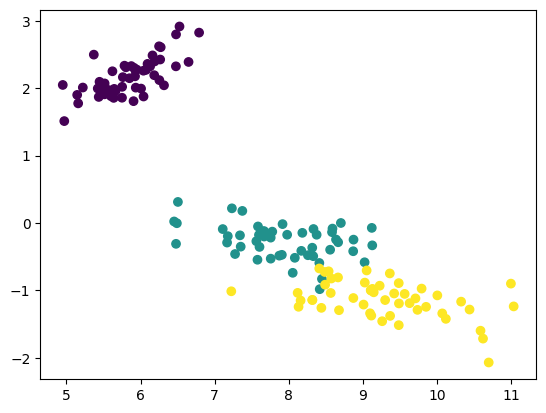

In [3]:
from sklearn.datasets import load_iris
from sklearn.decomposition import TruncatedSVD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c=iris.target)
plt.show()

Task2_0731. Task1_0731 사례를 PCA로 적용한 시각화 결과와 비교하세요.

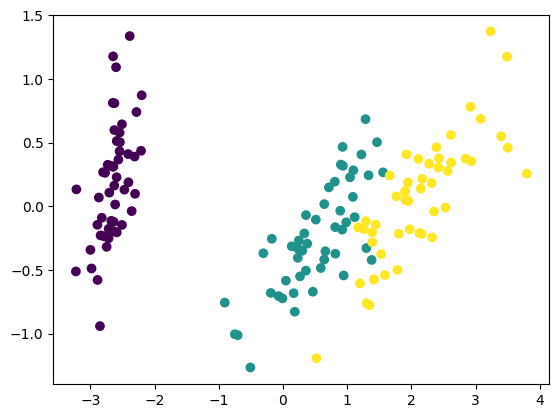

In [5]:
# pca
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(iris_ftrs)

iris_pca = pca.transform(iris_ftrs)

plt.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c=iris.target)
plt.show()

Task3_0731. 와인 품질 데이터셋을 사용하여 Truncated SVD를 통해 차원 축소를 수행하고, 로지스틱 회귀 모델을 학습 및 평가를 수행하세요.(다음 사항 참조)

- 특성 및 레이블 분리: 데이터셋에서 와인의 화학적 특성(X)과 품질 레이블(y)을 분리합니다.
- 레이블 변환: 와인 품질을 범주형 변수로 변환합니다. 구체적으로, 품질 점수가 3-5인 경우 'low', 6인 경우 'medium', 7-8인 경우 'high'로 변환합니다.
- 데이터 정규화: StandardScaler를 사용하여 데이터의 특성을 정규화합니다.
- 차원 축소: TruncatedSVD를 사용하여 데이터의 차원을 5로 축소합니다.
- 데이터 분할: 데이터를 학습용과 테스트용으로 분할합니다.
- 모델 학습: 로지스틱 회귀 모델을 학습합니다.
- 모델 예측 및 평가: 테스트 데이터에 대한 예측을 수행하고, 정확도와 분류 보고서를 출력

In [18]:
import pandas as pd

# 1. 데이터 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
wine = data.copy()
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


feature 성분
 - fixed acidity: 고정 산도 (g/L)
 - volatile acidity: 휘발성 산도 (g/L)
 - citric acid: 구연산 (g/L)
 - residual sugar: 잔여 설탕 (g/L)
 - chlorides: 염화물 (g/L)
 - free sulfur dioxide: 자유 이산화황 (mg/L)
 - total sulfur dioxide: 총 이산화황 (mg/L)
 - density: 밀도 (g/cm³ 또는 g/mL)
 - pH: 산도 (pH 단위)
 - sulphates: 황산염 (g/L)
 - alcohol: 알코올 함량 (%)

label 성분
 - quality: 품질 등급 (정수)

In [19]:
from sklearn.preprocessing import StandardScaler

X = wine.drop('quality', axis=1)
y = wine['quality']

y = y.apply(lambda x: 'low' if x <= 5 else ('medium' if x == 6 else 'high'))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<function matplotlib.pyplot.show(close=None, block=None)>

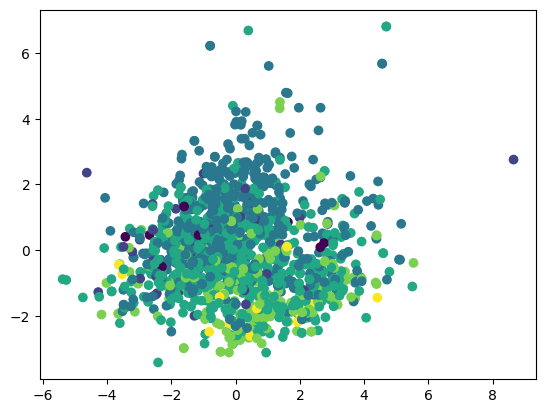

In [20]:
# 차원 축소
wine_ftrs = X_scaled

tsvd = TruncatedSVD(n_components=5)
tsvd.fit(wine_ftrs)
wine_tsvd = tsvd.transform(wine_ftrs)

plt.scatter(x=wine_tsvd[:,0], y= wine_tsvd[:,1], c=wine.quality)
plt.show

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(wine_tsvd, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.571875
Classification Report:
               precision    recall  f1-score   support

        high       0.44      0.26      0.32        47
         low       0.64      0.80      0.71       141
      medium       0.50      0.44      0.47       132

    accuracy                           0.57       320
   macro avg       0.53      0.50      0.50       320
weighted avg       0.55      0.57      0.55       320

